# Error evaluation 

* If there is a missing element in the vector:
    * observe position of the robot arm -> compute euclidean distance between position of the arm with identified element and the goal_position element. 
    * need to differentiate the case "missing_place" and "place1" error -> "place1" should be more penalized that "missing_place"

* If no missing element, but still an error: 
    * penalty given is the euclidean distance btwn position of robot arm and element in question.

## Analysis of the type of errors 

* CASE 1: error + missing element -> penalty can be computed as the euclidean distance btw robot arm and element missing 
* CASE 2: error + non missing element -> what penalty ? 
* CASE 3: no error + missing element -> what penalty ? 

* Idea: 
    * In case there is a missing element: replace "ra-world-arm" by the element missing 
    * Compute then the euclidean distance between each element 
    * Interesting to observe: 
        * How many pct overall of errors + missing -> also this case with each type of cases (aka move1, pickup1 and place1)
        * How many pct overall of errors + non-missing -> also this case with each type of cases (aka move1, pickup1 and place1)
        * How many pct overall of non-errors + missing -> cases for missing_place 

In [1]:
import pandas as pd 
import numpy as np
import ast
from itertools import permutations
from distances import preprocess
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
def detect_missing_element(v, goal_v): 
    
    missing_element = None
    
    v_matrix = preprocess(v)
    goal_matrix = preprocess(goal_v)
    
    initial_count_A = np.count_nonzero(v_matrix == 'A')
    initial_count_B = np.count_nonzero(v_matrix == 'B')

    goal_count_A = np.count_nonzero(goal_matrix == 'A')
    goal_count_B = np.count_nonzero(goal_matrix == 'B')
    
    if initial_count_A < goal_count_A:
        missing_element = 'A'
    elif initial_count_B < goal_count_B:
        missing_element = 'B'
        
    error = initial_count_A != goal_count_A or initial_count_B != goal_count_B
    
    return int(error)

In [3]:
def detect_error(worldspace):
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeA", "A")
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeB", "B")
    worldspace = ast.literal_eval(worldspace)
    
    matrix = []
    for i in range(len(worldspace)):
        matrix.append(worldspace[i].split(','))
        
    return int(matrix[-1][-1] != 'false')

In [4]:
def detect_type_error(worldspace, type_error):
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeA", "A")
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeB", "B")
    worldspace = ast.literal_eval(worldspace)
    
    matrix = []
    for i in range(len(worldspace)):
        matrix.append(worldspace[i].split(','))
    
    
    if matrix[-1][-1] == type_error:
        return 1
    else :
        return 0

#### Dataset initialisation

In [5]:
df = pd.read_csv("data/ldw_2023_pilot_coding_tasks_outputs_processed_3.csv")

In [6]:
robotarm_df = df[df['Activity Name'] == 'RobotArm']

robotarm_l1 = robotarm_df[robotarm_df['Activity ID'] == "P1M120"]
robotarm_l2 = robotarm_df[robotarm_df['Activity ID'] == "P1M123"]
robotarm_l3 = robotarm_df[robotarm_df['Activity ID'] == "P1M124"]

In [7]:
robotarm_l1 = robotarm_l1[["Student ID", "timestamp", "WorldSpace", "WorldspaceScore"]]
robotarm_l2 = robotarm_l2[["Student ID", "timestamp", "WorldSpace", "WorldspaceScore"]]
robotarm_l3 = robotarm_l3[["Student ID", "timestamp", "WorldSpace", "WorldspaceScore"]]

In [8]:
key_vector_l1 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"
key_vector_l2 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,ra-world-shape ra-world-shapeB,E,ra-world-shape ra-world-shapeA,E,', 'E,ra-world-shape ra-world-shapeB,E,ra-world-shape ra-world-shapeA,E,false']"
key_vector_l3 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,E,', 'ra-world-shape ra-world-shapeA,ra-world-shape ra-world-shapeB,E,E,E,', 'ra-world-shape ra-world-shapeA,ra-world-shape ra-world-shapeB,E,E,E,false']"


#### Cleaning data

In [9]:
# dropping NaN values in worldspace

robotarm_l1 = robotarm_l1.dropna(subset=['WorldSpace'])
robotarm_l2 = robotarm_l2.dropna(subset=['WorldSpace'])
robotarm_l3 = robotarm_l3.dropna(subset=['WorldSpace'])

#### Separating students into failing and successful ones 

In [10]:
robotarm_l1_grouped = robotarm_l1.groupby('Student ID').apply(lambda x: 1 in x['WorldspaceScore'].values)

# separate the students into two groups
success_students_l1 = robotarm_l1_grouped[robotarm_l1_grouped == True].index
failure_students_l1 = robotarm_l1_grouped[robotarm_l1_grouped == False].index

set(success_students_l1.intersection(failure_students_l1)) == set()

True

In [11]:
robotarm_l2_grouped = robotarm_l2.groupby('Student ID').apply(lambda x: 1 in x['WorldspaceScore'].values)

# separate the students into two groups
success_students_l2 = robotarm_l2_grouped[robotarm_l2_grouped == True].index
failure_students_l2 = robotarm_l2_grouped[robotarm_l2_grouped == False].index

set(success_students_l2.intersection(failure_students_l2)) == set()

True

In [12]:
robotarm_l3_grouped = robotarm_l3.groupby('Student ID').apply(lambda x: 1 in x['WorldspaceScore'].values)

# separate the students into two groups
success_students_l3 = robotarm_l3_grouped[robotarm_l3_grouped == True].index
failure_students_l3 = robotarm_l3_grouped[robotarm_l3_grouped == False].index

set(success_students_l3.intersection(failure_students_l3)) == set()

True

#### Index the tentatives 

In [13]:
robotarm_l1 = robotarm_l1.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='timestamp')).reset_index(drop=True)
robotarm_l1['index'] = robotarm_l1.groupby('Student ID').cumcount()

robotarm_l2 = robotarm_l2.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='timestamp')).reset_index(drop=True)
robotarm_l2['index'] = robotarm_l2.groupby('Student ID').cumcount()

robotarm_l3 = robotarm_l3.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='timestamp')).reset_index(drop=True)
robotarm_l3['index'] = robotarm_l3.groupby('Student ID').cumcount()

#### Percentage activity

In [14]:
robotarm_l1['pct_activity'] = robotarm_l1['index'] / robotarm_l1.groupby('Student ID')['index'].transform('max')
robotarm_l2['pct_activity'] = robotarm_l2['index'] / robotarm_l2.groupby('Student ID')['index'].transform('max')
robotarm_l3['pct_activity'] = robotarm_l3['index'] / robotarm_l3.groupby('Student ID')['index'].transform('max')

In [15]:
robotarm_l1["tot_tentative"] = robotarm_l1.groupby('Student ID')['index'].transform('max')
robotarm_l2["tot_tentative"] = robotarm_l2.groupby('Student ID')['index'].transform('max')
robotarm_l3["tot_tentative"] = robotarm_l3.groupby('Student ID')['index'].transform('max')

#### Create columns for error and missing elements

In [16]:
robotarm_l1["error"] = robotarm_l1['WorldSpace'].apply(lambda x: detect_error(x))
robotarm_l2["error"] = robotarm_l2['WorldSpace'].apply(lambda x: detect_error(x))
robotarm_l3["error"] = robotarm_l3['WorldSpace'].apply(lambda x: detect_error(x))

robotarm_l1["missing_element"] = robotarm_l1['WorldSpace'].apply(lambda x: detect_missing_element(x, key_vector_l1))
robotarm_l2["missing_element"] = robotarm_l2['WorldSpace'].apply(lambda x: detect_missing_element(x, key_vector_l2))
robotarm_l3["missing_element"] = robotarm_l3['WorldSpace'].apply(lambda x: detect_missing_element(x, key_vector_l3))


for error in ['move1', 'move2', 'pickup1', 'place1']: 
    robotarm_l1[error] = robotarm_l1['WorldSpace'].apply(lambda x: detect_type_error(x, error))
    robotarm_l2[error] = robotarm_l2['WorldSpace'].apply(lambda x: detect_type_error(x, error))
    robotarm_l3[error] = robotarm_l3['WorldSpace'].apply(lambda x: detect_type_error(x, error))
    
for x in ['error', 'missing_element', 'move1', 'move2', 'pickup1', 'place1']: 
    robotarm_l1[f"nb_{x}"] = robotarm_l1.groupby('Student ID')[x].transform('sum')
    robotarm_l2[f"nb_{x}"] = robotarm_l2.groupby('Student ID')[x].transform('sum')
    robotarm_l3[f"nb_{x}"] = robotarm_l3.groupby('Student ID')[x].transform('sum')

#### Create percentage error columns 

In [17]:
for x in ['error', 'missing_element', 'move1', 'move2', 'pickup1', 'place1']: 
    robotarm_l1[f"pct_{x}"] = robotarm_l1[f"nb_{x}"] / robotarm_l1['tot_tentative']
    robotarm_l2[f"pct_{x}"] = robotarm_l2[f"nb_{x}"] / robotarm_l2['tot_tentative']
    robotarm_l3[f"pct_{x}"] = robotarm_l3[f"nb_{x}"] / robotarm_l3['tot_tentative']

#### Grouping per student

In [18]:
robotarm_l1_per_student = robotarm_l1.groupby('Student ID').agg({"tot_tentative": "max", "nb_error": "max", "nb_missing_element": "max", 
                                                                "nb_move1": "max", "nb_move2": "max", "nb_pickup1": "max", "nb_place1": "max", 
                                                                "pct_error": "max", "pct_missing_element": "max", "pct_move1": "max", 
                                                                "pct_move2": "max", "pct_pickup1": "max", "pct_place1": "max"})

robotarm_l2_per_student = robotarm_l2.groupby('Student ID').agg({"tot_tentative": "max", "nb_error": "max", "nb_missing_element": "max", 
                                                                "nb_move1": "max", "nb_move2": "max", "nb_pickup1": "max", "nb_place1": "max", 
                                                                "pct_error": "max", "pct_missing_element": "max", "pct_move1": "max", 
                                                                "pct_move2": "max", "pct_pickup1": "max", "pct_place1": "max"})

robotarm_l3_per_student = robotarm_l3.groupby('Student ID').agg({"tot_tentative": "max", "nb_error": "max", "nb_missing_element": "max", 
                                                                "nb_move1": "max", "nb_move2": "max", "nb_pickup1": "max", "nb_place1": "max", 
                                                                "pct_error": "max", "pct_missing_element": "max", "pct_move1": "max", 
                                                                "pct_move2": "max", "pct_pickup1": "max", "pct_place1": "max"})

#### Separating the datasets

In [19]:
robotarm_l1_success = robotarm_l1[robotarm_l1['Student ID'].isin(success_students_l1)]
robotarm_l2_success = robotarm_l2[robotarm_l2['Student ID'].isin(success_students_l2)]
robotarm_l3_success = robotarm_l3[robotarm_l3['Student ID'].isin(success_students_l3)]

robotarm_l1_failure = robotarm_l1[robotarm_l1['Student ID'].isin(failure_students_l1)]
robotarm_l2_failure = robotarm_l2[robotarm_l2['Student ID'].isin(failure_students_l2)]
robotarm_l3_failure = robotarm_l3[robotarm_l3['Student ID'].isin(failure_students_l3)]

In [20]:
robotarm_l1_success_per_student = robotarm_l1_per_student[robotarm_l1_per_student.index.isin(success_students_l1)]
robotarm_l2_success_per_student = robotarm_l2_per_student[robotarm_l2_per_student.index.isin(success_students_l2)]
robotarm_l3_success_per_student = robotarm_l3_per_student[robotarm_l3_per_student.index.isin(success_students_l3)]

robotarm_l1_failure_per_student = robotarm_l1_per_student[robotarm_l1_per_student.index.isin(failure_students_l1)]
robotarm_l2_failure_per_student = robotarm_l2_per_student[robotarm_l2_per_student.index.isin(failure_students_l2)]
robotarm_l3_failure_per_student = robotarm_l3_per_student[robotarm_l3_per_student.index.isin(failure_students_l3)]

### Visualisations

How many errors per students do we have ? 

In [35]:
def generate_all_pct(df1, df2, df3): 
    error = []
    missing_element = []
    move1 = []
    move2 = []
    pickup1 = []
    place1 = []
    
    for df in [df1, df2, df3]: 
        error.append(len(df[df['error'] == 1]) / len(df) * 100)
        missing_element.append(len(df[df['missing_element'] == 1]) / len(df) * 100)
        move1.append(len(df[df['move1'] == 1]) / len(df) * 100)
        move2.append(len(df[df['move2'] == 1]) / len(df) * 100)
        pickup1.append(len(df[df['pickup1'] == 1]) / len(df) * 100)
        place1.append(len(df[df['place1'] == 1]) / len(df) * 100)
        
    return error, missing_element, move1, move2, pickup1, place1

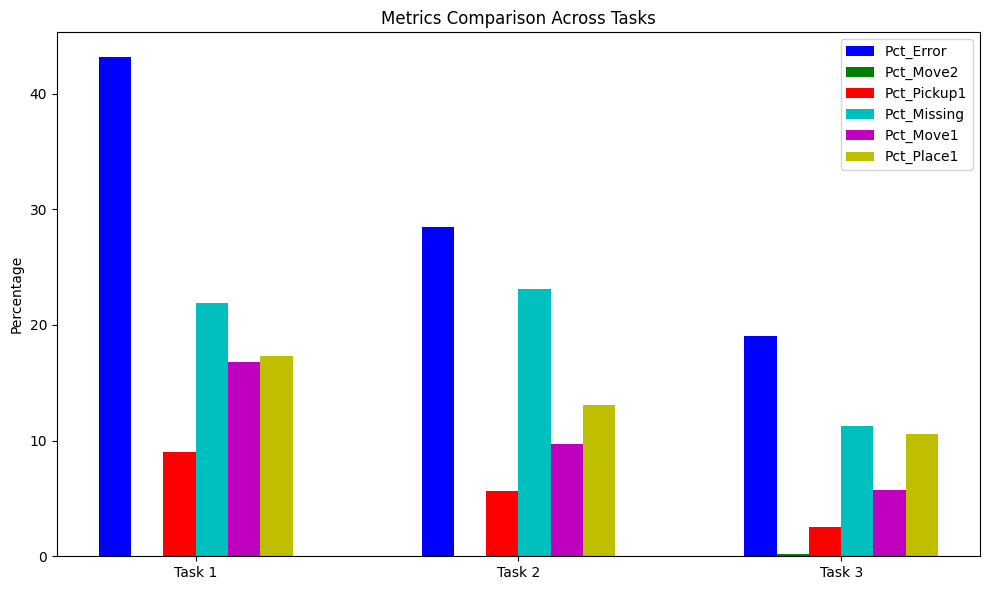

In [36]:
error_list, missing_element_list, move1_list, move2_list, pickup1_list, place1_list = generate_all_pct(robotarm_l1, robotarm_l2, robotarm_l3)

datasets = ["Task 1", "Task 2", "Task 3"]


data = {
    "Task": datasets,
    "Pct_Error": error_list,
    "Pct_Missing": missing_element_list,
    "Pct_Move1": move1_list,
    "Pct_Move2": move2_list,
    "Pct_Pickup1": pickup1_list,
    "Pct_Place1": place1_list
}

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
index = np.arange(len(datasets))

colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i, metric in enumerate(data.keys() - ['Task']):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric, color=colors[i])

ax.set_ylabel('Percentage')
ax.set_title('Metrics Comparison Across Tasks')
ax.set_xticks(index + bar_width * (len(data.keys()) - 2) / 2)
ax.set_xticklabels(datasets)
ax.legend()

plt.tight_layout()
plt.show()


CASE 1 : How many of them are errors AND have a missing element ? 

In [37]:
def generate_list_missing_error(df1, df2, df3):
    error_missing_list = []
    move1_missing_list = []
    move2_missing_list = []
    pickup1_missing_list = []
    place1_missing_list = []

    dfs = [df1, df2, df3]

    for df in dfs:
        error_missing_list.append(len(df[(df['error'] == 1) & (df['missing_element'] == 1)]) / df.shape[0] * 100)
        move1_missing_list.append(len(df[(df['move1'] == 1) & (df['missing_element'] == 1)]) / df.shape[0] * 100)
        move2_missing_list.append(len(df[(df['move2'] == 1) & (df['missing_element'] == 1)]) / df.shape[0] * 100)
        pickup1_missing_list.append(len(df[(df['pickup1'] == 1) & (df['missing_element'] == 1)]) / df.shape[0] * 100)
        place1_missing_list.append(len(df[(df['place1'] == 1) & (df['missing_element'] == 1)]) / df.shape[0] * 100)

    return error_missing_list, move1_missing_list, move2_missing_list, pickup1_missing_list, place1_missing_list


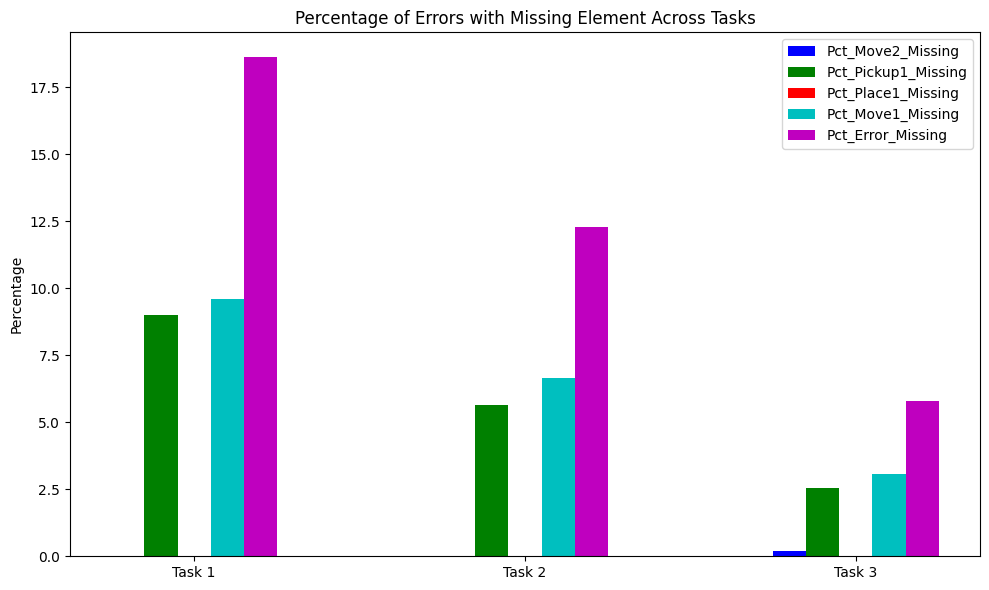

In [38]:
error_missing_list, move1_missing_list, move2_missing_list, pickup1_missing_list, place1_missing_list = generate_list_missing_error(robotarm_l1, robotarm_l2, robotarm_l3)

datasets = ["Task 1", "Task 2", "Task 3"]

data = {
    "Task": datasets,
    "Pct_Error_Missing": error_missing_list,
    "Pct_Move1_Missing": move1_missing_list,
    "Pct_Move2_Missing": move2_missing_list,
    "Pct_Pickup1_Missing": pickup1_missing_list,
    "Pct_Place1_Missing": place1_missing_list
}

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
index = np.arange(len(datasets))

colors = ['b', 'g', 'r', 'c', 'm']

for i, metric in enumerate(data.keys() - ['Task']):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric, color=colors[i])

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Errors with Missing Element Across Tasks')
ax.set_xticks(index + bar_width * (len(data.keys()) - 2) / 2)
ax.set_xticklabels(datasets)
ax.legend()

plt.tight_layout()
plt.show()

CASE 2 : error with non missing element 

In [39]:
def generate_error_non_missing(df1, df2, df3): 
    error_non_missing_list = []
    move1_non_missing_list = []
    move2_non_missing_list = []
    pickup1_non_missing_list = []
    place1_non_missing_list = []
    
    dfs = [df1, df2, df3]
    
    for df in dfs: 
        error_non_missing_list.append(len(df[(df['error'] == 1) & (df['missing_element'] == 0)]) / df.shape[0] * 100)
        move1_non_missing_list.append(len(df[(df['move1'] == 1) & (df['missing_element'] == 0)]) / df.shape[0] * 100)
        move2_non_missing_list.append(len(df[(df['move2'] == 1) & (df['missing_element'] == 0)]) / df.shape[0] * 100)
        pickup1_non_missing_list.append(len(df[(df['pickup1'] == 1) & (df['missing_element'] == 0)]) / df.shape[0] * 100)
        place1_non_missing_list.append(len(df[(df['place1'] == 1) & (df['missing_element'] == 0)]) / df.shape[0] * 100)

    return error_non_missing_list, move1_non_missing_list, move2_non_missing_list, pickup1_non_missing_list, place1_non_missing_list

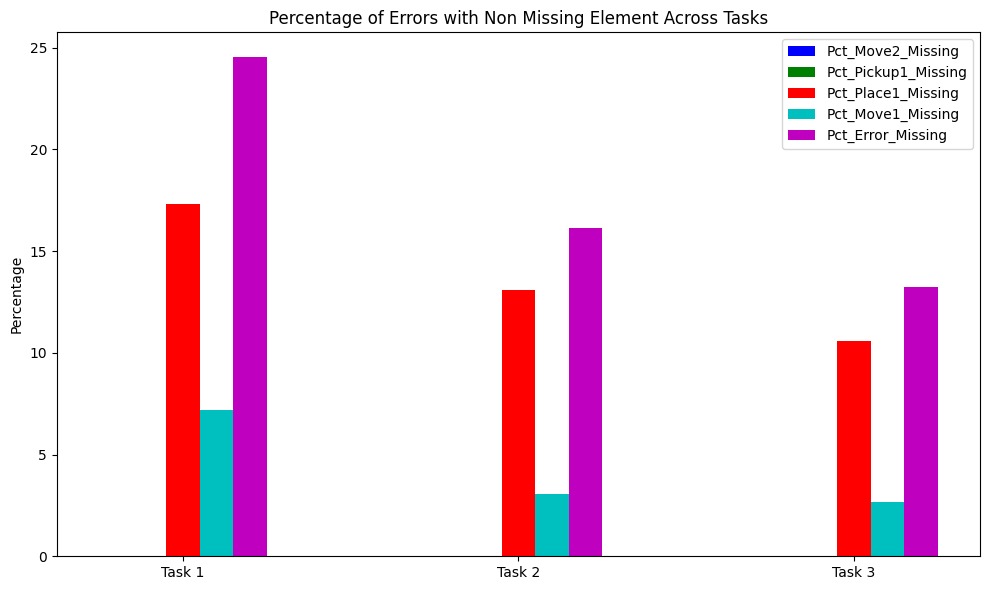

In [40]:
error_non_missing_list, move1_non_missing_list, move2_non_missing_list, pickup1_non_missing_list, place1_non_missing_list = generate_error_non_missing(robotarm_l1, robotarm_l2, robotarm_l3)

datasets = ["Task 1", "Task 2", "Task 3"]

data = {
    "Task": datasets,
    "Pct_Error_Missing": error_non_missing_list,
    "Pct_Move1_Missing": move1_non_missing_list,
    "Pct_Move2_Missing": move2_non_missing_list,
    "Pct_Pickup1_Missing": pickup1_non_missing_list,
    "Pct_Place1_Missing": place1_non_missing_list
}

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
index = np.arange(len(datasets))

colors = ['b', 'g', 'r', 'c', 'm']

for i, metric in enumerate(data.keys() - ['Task']):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric, color=colors[i])

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Errors with Non Missing Element Across Tasks')
ax.set_xticks(index + bar_width * (len(data.keys()) - 2) / 2)
ax.set_xticklabels(datasets)
ax.legend()

plt.tight_layout()
plt.show()

In [41]:
def generate_missing_non_error(df1, df2, df3): 
    missing_non_error_list = []
    dfs = [df1, df2, df3]
    
    for df in dfs: 
        missing_non_error_list.append(len(df[(df['error'] == 0) & (df['missing_element'] == 1)]) / df.shape[0] * 100)

    return missing_non_error_list

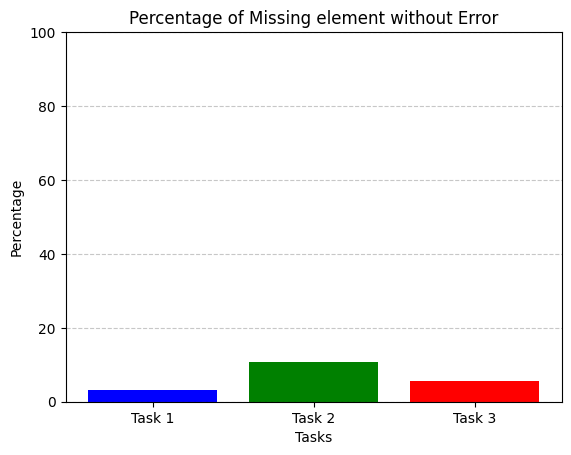

In [42]:
missing_non_error_list = generate_missing_non_error(robotarm_l1, robotarm_l2, robotarm_l3)

datasets = ["Task 1", "Task 2", "Task 3"]

plt.bar(datasets, missing_non_error_list, color=['blue', 'green', 'red'])
plt.xlabel('Tasks')
plt.ylabel('Percentage')
plt.title('Percentage of Missing element without Error')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

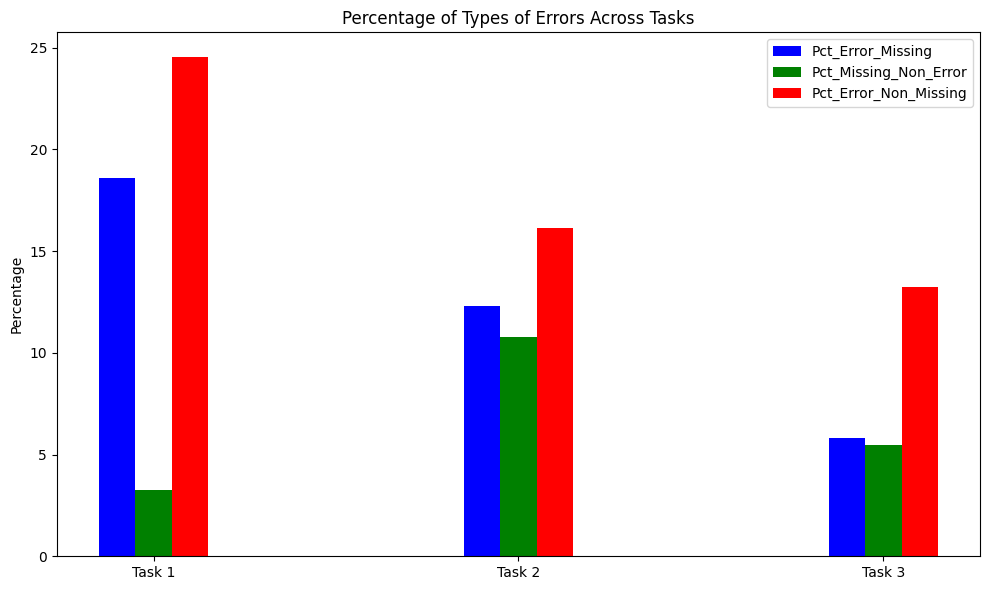

In [44]:
data = {
    "Task": datasets,
    "Pct_Error_Missing": error_missing_list,
    "Pct_Error_Non_Missing": error_non_missing_list,
    "Pct_Missing_Non_Error": missing_non_error_list
}

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
index = np.arange(len(datasets))

colors = ['b', 'g', 'r', 'c', 'm']

labels = ["Total Errors", "Errors with Missing Element", "Errors without Missing Element", "Missing Element which are not Errors"]

for i, metric in enumerate(data.keys() - ['Task']):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric, color=colors[i])

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Types of Errors Across Tasks')
ax.set_xticks(index + bar_width * (len(data.keys()) - 2) / 2)
ax.set_xticklabels(datasets)
ax.legend()

plt.tight_layout()
plt.show()

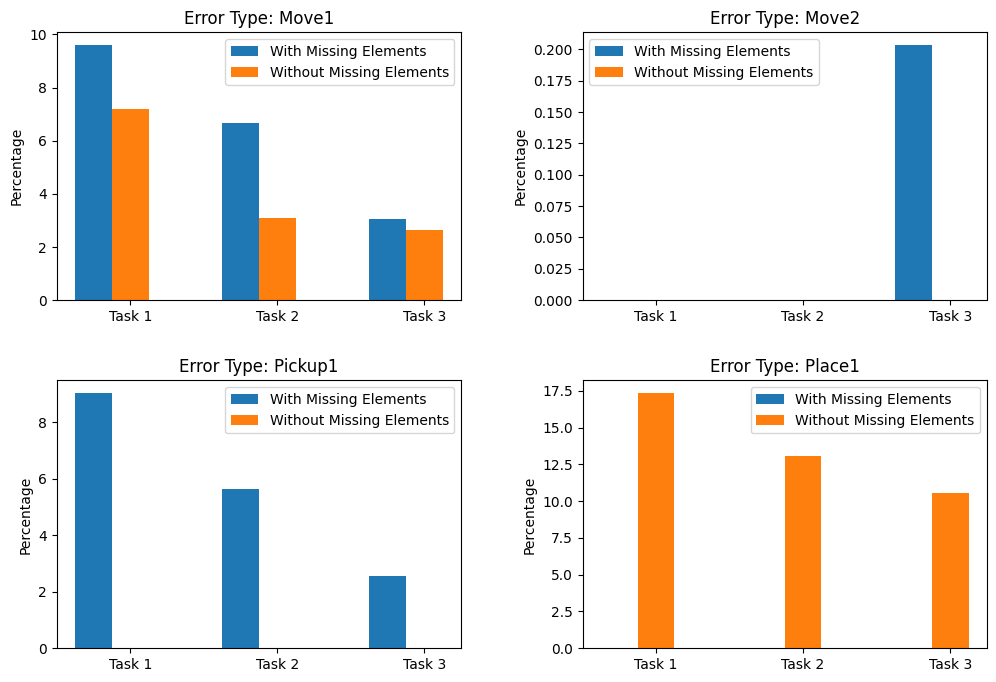

In [46]:

tasks = ['Task 1', 'Task 2', 'Task 3']
error_types = ['Move1', 'Move2', 'Pickup1', 'Place1']

data = {
    'Move1': [[move1_missing_list[0], move1_non_missing_list[0]], 
              [move1_missing_list[1], move1_non_missing_list[1]], 
              [move1_missing_list[2], move1_non_missing_list[2]]],
    'Move2': [[move2_missing_list[0], move2_non_missing_list[0]], 
              [move2_missing_list[1], move2_non_missing_list[1]], 
              [move2_missing_list[2], move2_non_missing_list[2]]],
    'Pickup1': [[pickup1_missing_list[0], pickup1_non_missing_list[0]], 
              [pickup1_missing_list[1], pickup1_non_missing_list[1]], 
              [pickup1_missing_list[2], pickup1_non_missing_list[2]]],
    'Place1': [[place1_missing_list[0], place1_non_missing_list[0]], 
              [place1_missing_list[1], place1_non_missing_list[1]], 
              [place1_missing_list[2], place1_non_missing_list[2]]]
}

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axs.flat):
    error_type = error_types[i]
    ax.set_title(f'Error Type: {error_type}')
    ax.set_ylabel('Percentage')

    # Get data for current error type
    error_data = data[error_type]

    # Plot bars for each task
    bar_width = 0.25
    index = np.arange(len(tasks))

    with_missing = [item[0] for item in error_data]
    without_missing = [item[1] for item in error_data]

    ax.bar(index, with_missing, bar_width, label='With Missing Elements')
    ax.bar(index + bar_width, without_missing, bar_width, label='Without Missing Elements')

    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(tasks)
    ax.legend()

plt.show()


1. The 3 cases appear with a non-negligible percentage across the tasks 
2. In particular, we observe that for move1, we have cases of non-missing AND missing elements, which means that : 
    * We should give an error penalty for an error -> a fixed one 
    * How to distinguish place1 errors and move1 errors with non-missing elements ? 
    * How to distinguish pickup1 errors and move1 errors with missing elements ?
    * What if we get exactly the same vector, but with different error ? 
    * How should we differentiate them ? Should we give different penalties ? 
3. There is also a non-negligible percentage of cases where we have a missing element, without an error, which means that : 
    * How to distinguish cases where we have a missing element but non-error, with a case of missing elements WITH an error (in particular move1) ? 
    * Penalty -> computation of euclidean distance with robot arm, but consider really same vectors, but one without an error and one with an error ? 
    * Obviously, the case with an error should be more penalised than the one with an error -> are there such cases ? 


Are there (1) cases ? move1 with missing elements and pickup1 with similar vectors 
* The penalty is already given by the missing element (distance of the robot arm and goal position of the element)
* But we still need to give a supplementary penalty -> cases where error and not error occur

In [107]:
move1_missing_vectors_l1 = robotarm_l1[(robotarm_l1['move1'] == 1) & (robotarm_l1['missing_element'] == 1)]['WorldSpace'].values
move1_missing_vectors_l2 = robotarm_l2[(robotarm_l2['move1'] == 1) & (robotarm_l2['missing_element'] == 1)]['WorldSpace'].values
move1_missing_vectors_l3 = robotarm_l3[(robotarm_l3['move1'] == 1) & (robotarm_l3['missing_element'] == 1)]['WorldSpace'].values

pickup1_vectors_l1 = robotarm_l1[(robotarm_l1['pickup1'] == 1)]['WorldSpace'].values
pickup1_vectors_l2 = robotarm_l2[(robotarm_l2['pickup1'] == 1)]['WorldSpace'].values
pickup1_vectors_l3 = robotarm_l3[(robotarm_l3['pickup1'] == 1)]['WorldSpace'].values

for i in range(len(pickup1_vectors_l1)):
    pickup1_vectors_l1[i] = pickup1_vectors_l1[i].replace("pickup1", "move1")
    
for i in range(len(pickup1_vectors_l2)):
    pickup1_vectors_l2[i] = pickup1_vectors_l2[i].replace("pickup1", "move1")

for i in range(len(pickup1_vectors_l3)):
    pickup1_vectors_l3[i] = pickup1_vectors_l3[i].replace("pickup1", "move1")
    

# check if overlap between move1 and pickup1

overlap_l1 = set(move1_missing_vectors_l1).intersection(set(pickup1_vectors_l1))
overlap_l2 = set(move1_missing_vectors_l2).intersection(set(pickup1_vectors_l2))
overlap_l3 = set(move1_missing_vectors_l3).intersection(set(pickup1_vectors_l3))

print(f"Overlap between move1 and pickup1 for Task 1: {len(overlap_l1)}")
print(f"Overlap between move1 and pickup1 for Task 2: {len(overlap_l2)}")   
print(f"Overlap between move1 and pickup1 for Task 3: {len(overlap_l3)}")

Overlap between move1 and pickup1 for Task 1: 5
Overlap between move1 and pickup1 for Task 2: 1
Overlap between move1 and pickup1 for Task 3: 2


Are there (2) cases ? move1 with non-missing elements and plac1 vectors

In [108]:
move1_non_missing_vectors_l1 = robotarm_l1[(robotarm_l1['move1'] == 1) & (robotarm_l1['missing_element'] == 0)]['WorldSpace'].values
move1_non_missing_vectors_l2 = robotarm_l2[(robotarm_l2['move1'] == 1) & (robotarm_l2['missing_element'] == 0)]['WorldSpace'].values
move1_non_missing_vectors_l3 = robotarm_l3[(robotarm_l3['move1'] == 1) & (robotarm_l3['missing_element'] == 0)]['WorldSpace'].values

place1_vectors_l1 = robotarm_l1[(robotarm_l1['place1'] == 1)]['WorldSpace'].values
place1_vectors_l2 = robotarm_l2[(robotarm_l2['place1'] == 1)]['WorldSpace'].values
place1_vectors_l3 = robotarm_l3[(robotarm_l3['place1'] == 1)]['WorldSpace'].values

for i in range(len(place1_vectors_l1)):
    place1_vectors_l1[i] = place1_vectors_l1[i].replace("place1", "move1")
    
for i in range(len(place1_vectors_l2)):
    place1_vectors_l2[i] = place1_vectors_l2[i].replace("place1", "move1")

for i in range(len(place1_vectors_l3)):
    place1_vectors_l3[i] = place1_vectors_l3[i].replace("place1", "move1")
    

# check if overlap between move1 and pickup1

overlap_l1 = set(move1_non_missing_vectors_l1).intersection(set(place1_vectors_l1))
overlap_l2 = set(move1_non_missing_vectors_l2).intersection(set(place1_vectors_l2))
overlap_l3 = set(move1_non_missing_vectors_l3).intersection(set(place1_vectors_l3))

print(f"Overlap between move1 and place1 for Task 1: {len(overlap_l1)}")
print(f"Overlap between move1 and place1 for Task 2: {len(overlap_l2)}")   
print(f"Overlap between move1 and place1 for Task 3: {len(overlap_l3)}")

Overlap between move1 and place1 for Task 1: 11
Overlap between move1 and place1 for Task 2: 8
Overlap between move1 and place1 for Task 3: 4


Are there (3) cases ? 

In [109]:
errors_missing_vectors_l1 = robotarm_l1[(robotarm_l1['error'] == 1) & (robotarm_l1['missing_element'] == 1)]['WorldSpace'].values
errors_missing_vectors_l2 = robotarm_l2[(robotarm_l2['error'] == 1) & (robotarm_l2['missing_element'] == 1)]['WorldSpace'].values
errors_missing_vectors_l3 = robotarm_l3[(robotarm_l3['error'] == 1) & (robotarm_l3['missing_element'] == 1)]['WorldSpace'].values

missing_vectors_l1 = robotarm_l1[(robotarm_l1['error'] == 0) & (robotarm_l1['missing_element'] == 1)]['WorldSpace'].values
missing_vectors_l2 = robotarm_l2[(robotarm_l2['error'] == 0) & (robotarm_l2['missing_element'] == 1)]['WorldSpace'].values
missing_vectors_l3 = robotarm_l3[(robotarm_l3['error'] == 0) & (robotarm_l3['missing_element'] == 1)]['WorldSpace'].values

# for each element in the missing_vectors, replace "false" with "move1"
for i in range(len(missing_vectors_l1)):
    missing_vectors_l1[i] = missing_vectors_l1[i].replace("false", "move1")
    
for i in range(len(missing_vectors_l2)):
    missing_vectors_l2[i] = missing_vectors_l2[i].replace("false", "move1")

for i in range(len(missing_vectors_l3)):
    missing_vectors_l3[i] = missing_vectors_l3[i].replace("false", "move1")

nb_overlap_l1 = set(errors_missing_vectors_l1).intersection(set(missing_vectors_l1))
nb_overlap_l2 = set(errors_missing_vectors_l2).intersection(set(missing_vectors_l2))
nb_overlap_l3 = set(errors_missing_vectors_l3).intersection(set(missing_vectors_l3))

pct_overlap_l1 = len(nb_overlap_l1) / robotarm_l1.shape[0] * 100
pct_overlap_l2 = len(nb_overlap_l2) / robotarm_l2.shape[0] * 100
pct_overlap_l3 = len(nb_overlap_l3) / robotarm_l3.shape[0] * 100

# print number of overlapping vectors
print(f"Number of overlapping vectors between errors with missing element and missing element without errors for Task 1: {len(nb_overlap_l1)}")
print(f"Number of overlapping vectors between errors with missing element and missing element without errors for Task 2: {len(nb_overlap_l2)}")
print(f"Number of overlapping vectors between errors with missing element and missing element without errors for Task 3: {len(nb_overlap_l3)}")

print(f"Percentage of overlap between errors with missing element and missing element without errors for Task 1: {pct_overlap_l1}")
print(f"Percentage of overlap between errors with missing element and missing element without errors for Task 2: {pct_overlap_l2}")
print(f"Percentage of overlap between errors with missing element and missing element without errors for Task 3: {pct_overlap_l3}")


Number of overlapping vectors between errors with missing element and missing element without errors for Task 1: 6
Number of overlapping vectors between errors with missing element and missing element without errors for Task 2: 1
Number of overlapping vectors between errors with missing element and missing element without errors for Task 3: 3
Percentage of overlap between errors with missing element and missing element without errors for Task 1: 0.351288056206089
Percentage of overlap between errors with missing element and missing element without errors for Task 2: 0.05589714924538849
Percentage of overlap between errors with missing element and missing element without errors for Task 3: 0.3051881993896236


* So yes, there exists such cases, but very few: could we consider them as negligible or not ??

### How many in success and failing students

In [111]:
success_error_missing_list, success_move1_missing_list, success_move2_missing_list, success_pickup1_missing_list, success_place1_missing_list = generate_list_missing_error(robotarm_l1_success, robotarm_l2_success, robotarm_l3_success)
fail_error_missing_list, fail_move1_missing_list, fail_move2_missing_list, fail_pickup1_missing_list, fail_place1_missing_list = generate_list_missing_error(robotarm_l1_failure, robotarm_l2_failure, robotarm_l3_failure)

In [113]:
success_error_non_missing_list, success_move1_non_missing_list, success_move2_non_missing_list, success_pickup1_non_missing_list, success_place1_non_missing_list = generate_error_non_missing(robotarm_l1_success, robotarm_l2_success, robotarm_l3_success)
fail_error_non_missing_list, fail_move1_non_missing_list, fail_move2_non_missing_list, fail_pickup1_non_missing_list, fail_place1_non_missing_list = generate_error_non_missing(robotarm_l1_failure, robotarm_l2_failure, robotarm_l3_failure)

In [115]:
success_missing_non_error = generate_missing_non_error(robotarm_l1_success, robotarm_l2_success, robotarm_l3_success)
fail_missing_non_error = generate_missing_non_error(robotarm_l1_failure, robotarm_l2_failure, robotarm_l3_failure)

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_10236/1944677803.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = len(df2[(robotarm_l2['error'] == 0) & (df2['missing_element'] == 1)]) / df2.shape[0] * 100
/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_10236/1944677803.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = len(df2[(robotarm_l2['error'] == 0) & (df2['missing_element'] == 1)]) / df2.shape[0] * 100


In [117]:
success_error_list = generate_tot_error(robotarm_l1_success, robotarm_l2_success, robotarm_l3_success)
failure_error_list = generate_tot_error(robotarm_l1_failure, robotarm_l2_failure, robotarm_l3_failure)

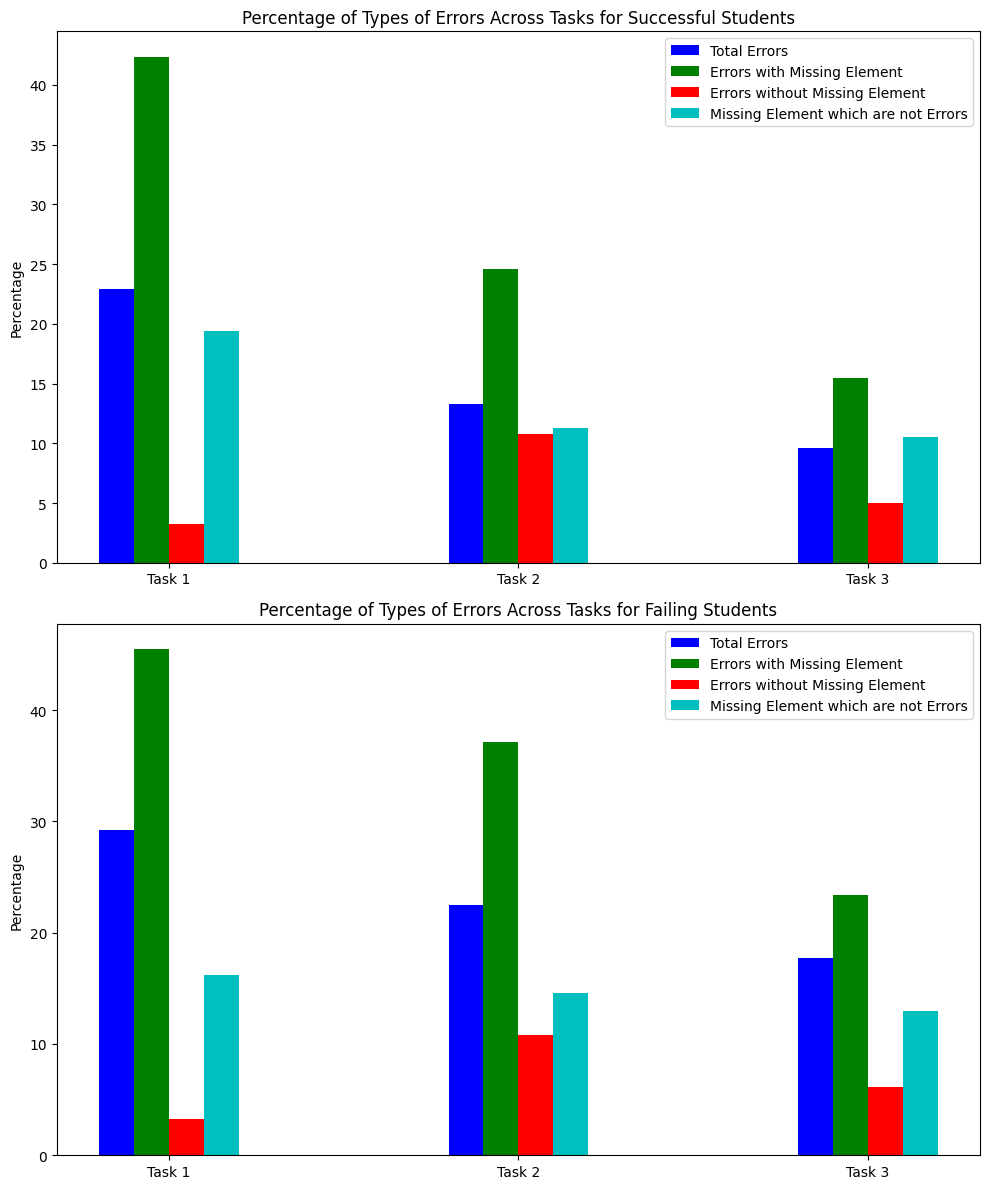

In [118]:
datasets = ['Task 1', 'Task 2', 'Task 3']

data_success = {
    "Task": datasets,
    "Pct_Errors": success_error_list,
    "Pct_Error_Missing": success_error_missing_list,
    "Pct_Error_Non_Missing": success_error_non_missing_list,
    "Pct_Missing_Non_Error": success_missing_non_error
}

data_fail = {
    "Task": datasets,
    "Pct_Errors": failure_error_list,
    "Pct_Error_Missing": fail_error_missing_list,
    "Pct_Error_Non_Missing": fail_error_non_missing_list,
    "Pct_Missing_Non_Error": fail_missing_non_error
}

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,12))

bar_width = 0.1
index = np.arange(len(datasets))

colors = ['b', 'g', 'r', 'c', 'm']

labels = ["Total Errors", "Errors with Missing Element", "Errors without Missing Element", "Missing Element which are not Errors"]

for i, metric in enumerate(data_success.keys() - ['Task']):
    ax[0].bar(index + i * bar_width, data_success[metric], bar_width, label=labels[i], color=colors[i])

ax[0].set_ylabel('Percentage')
ax[0].set_title(f'Percentage of Types of Errors Across Tasks for Successful Students')
ax[0].set_xticks(index + bar_width * (len(data_success.keys()) - 2) / 2)
ax[0].set_xticklabels(datasets)
ax[0].legend()

for i, metric in enumerate(data_fail.keys() - ['Task']):
    ax[1].bar(index + i * bar_width, data_fail[metric], bar_width, label=labels[i], color=colors[i])

ax[1].set_ylabel('Percentage')
ax[1].set_title(f'Percentage of Types of Errors Across Tasks for Failing Students')
ax[1].set_xticks(index + bar_width * (len(data_fail.keys()) - 2) / 2)
ax[1].set_xticklabels(datasets)
ax[1].legend()

plt.tight_layout()
plt.show()

### Modification of the euclidean distane 

* If an error=1: 
    * check if missing elements: 
        * replace the robotarm by the missing element in question, and include the computation of the distance between the robotarm position and the goal element position 
    * if no missing element but still an error: 
        * penalize it by a fixed penalty (for any error)

In [119]:
def euclidean_distance(v_matrix, goal_matrix): 
    
    tot_distance = 0
        
    initial_indices_A = np.argwhere(v_matrix == 'A')
    initial_indices_B = np.argwhere(v_matrix == 'B')
    goal_indices_A = np.argwhere(goal_matrix == 'A')
    goal_indices_B = np.argwhere(goal_matrix == 'B')

    init_permutations_indices_A = permutations(initial_indices_A)
    init_permutations_indices_B = permutations(initial_indices_B)
    goal_permutations_indices_A = permutations(goal_indices_A)
    goal_permutations_indices_B = permutations(goal_indices_B)

    init_permutations_indices_A = list(init_permutations_indices_A)
    init_permutations_indices_B = list(init_permutations_indices_B)
    goal_permutations_indices_A = list(goal_permutations_indices_A)
    goal_permutations_indices_B = list(goal_permutations_indices_B)
    
    distances_A = []
    distances_B = []
    
    # Calculate the maximum possible Euclidean distance
    max_distance = np.linalg.norm(np.array([0, 0]) - np.array([len(goal_matrix)-1, len(goal_matrix[0])-1]))

    # for A
    for goal_perm_A in goal_permutations_indices_A:
        for init_perm_A in init_permutations_indices_A:
            # Calculate Euclidean distance for the current permutation
            distance_A = [np.linalg.norm(goal_index - initial_index) for goal_index, initial_index in zip(np.array(goal_perm_A), np.array(init_perm_A))]
            distance_A = sum(distance_A)
            distances_A.append(distance_A)
            
    # for B
    for goal_perm_B in goal_permutations_indices_B:
        for init_perm_B in init_permutations_indices_B:
            # Calculate Euclidean distance for the current permutation
            distance_B = [np.linalg.norm(goal_index - initial_index) for goal_index, initial_index in zip(np.array(goal_perm_B), np.array(init_perm_B))]
            distance_B = sum(distance_B)
            distances_B.append(distance_B)
            
            
    min_distance_A = min(distances_A)
    min_distance_B = min(distances_B)
    
    # Normalize distances by dividing by the maximum distance
    normalized_distance_A = min_distance_A / max_distance if max_distance != 0 else 0
    normalized_distance_B = min_distance_B / max_distance if max_distance != 0 else 0
    
    # count how many elements are not equal to E in the v_matrix
    count = np.count_nonzero(v_matrix == 'A') + np.count_nonzero(v_matrix == 'B')

    tot_distance = (normalized_distance_A + normalized_distance_B) / count
    
    return tot_distance


In [120]:
def euclidean(v, goal_v, move1, place1, pickup1, missing, penalties):
    
    tot_distance = 0
        
    v_matrix = preprocess(v)
    goal_matrix = preprocess(goal_v)
    print(v_matrix)
    # if missing element 
    if missing == 1: 
        missing_element = None
        
        initial_count_A = np.count_nonzero(v_matrix == 'A')
        initial_count_B = np.count_nonzero(v_matrix == 'B')
        
        goal_count_A = np.count_nonzero(goal_matrix == 'A')
        goal_count_B = np.count_nonzero(goal_matrix == 'B')
        
        if initial_count_A < goal_count_A:
            missing_element = 'A'
        elif initial_count_B < goal_count_B:
            missing_element = 'B'
        
        print(missing_element)
        v = v.replace("ra-world-arm", missing_element)
        v_matrix = preprocess(v)
        
        print(v_matrix)
        
        tot_distance += euclidean_distance(v_matrix, goal_matrix)
        
        if move1 == 1:
            tot_distance += penalties['move1']
        elif pickup1 == 1:
            tot_distance += penalties['pickup1']
    
    else: 
        tot_distance += euclidean_distance(v_matrix, goal_matrix)
        
        if move1 == 1:
            tot_distance += penalties['move1']
        elif place1 == 1:
            tot_distance += penalties['place1']
    
    return tot_distance


### Testing

In [121]:
test1 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,move1']"
test2 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,ra-world-shape ra-world-shapeA,move1']"
test3 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"
test4 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,pickup1']"
test5 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,ra-world-shape ra-world-shapeA,false']"
test6 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,ra-world-shape ra-world-shapeA,place1']"

In [122]:
penalties = {'move1': 0.1, 'pickup1': 0.1, 'place1': 0.1}

In [123]:
euclidean(test1, key_vector_l1, 1, 0, 0, 1, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'A']]
A
[['E' 'E' 'E' 'E' 'A']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'A']]


0.4904344047215152

In [124]:
euclidean(test2, key_vector_l1, 1, 0, 0, 0, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['A' 'E' 'E' 'E' 'A']]


0.5273020288290922

In [125]:
euclidean(test3, key_vector_l1, 0, 0, 0, 1, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'A']]
A
[['E' 'E' 'E' 'E' 'A']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'A']]


0.3904344047215152

In [126]:
euclidean(test4, key_vector_l1, 0, 0, 1, 1, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'A']]
A
[['E' 'E' 'E' 'E' 'A']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'A']]


0.4904344047215152

In [127]:
euclidean(test5, key_vector_l1, 0, 0, 0, 0, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['A' 'E' 'E' 'E' 'A']]


0.4273020288290922

In [128]:
euclidean(test6, key_vector_l1, 0, 1, 0, 0, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['A' 'E' 'E' 'E' 'A']]


0.5273020288290922

In [129]:
key_vector_l2

"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,ra-world-shape ra-world-shapeB,E,ra-world-shape ra-world-shapeA,E,', 'E,ra-world-shape ra-world-shapeB,E,ra-world-shape ra-world-shapeA,E,false']"

In [130]:
preprocess(key_vector_l2)

array([['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'B', 'E', 'A', 'E'],
       ['E', 'B', 'E', 'A', 'E']], dtype='<U1')

In [131]:
test7 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,ra-world-shape ra-world-shapeA,E,E,', 'E,ra-world-shape ra-world-shapeB,ra-world-shape ra-world-shapeB,E,E,move1']"
test8 = "['E,E,E,ra-world-arm,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,ra-world-shape ra-world-shapeA,E,E,', 'E,ra-world-shape ra-world-shapeB,ra-world-shape ra-world-shapeB,E,E,false']"
test9 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,ra-world-shape ra-world-shapeA,E,E,', 'ra-world-shape ra-world-shapeA,ra-world-shape ra-world-shapeB,ra-world-shape ra-world-shapeB,E,E,move1']"
test10 = "['ra-world-arm,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,ra-world-shape ra-world-shapeA,E,E,', 'E,ra-world-shape ra-world-shapeB,ra-world-shape ra-world-shapeB,E,E,pickup1']"
test11 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,ra-world-shape ra-world-shapeA,E,E,', 'ra-world-shape ra-world-shapeA,ra-world-shape ra-world-shapeB,ra-world-shape ra-world-shapeB,E,E,place1']"
test12 = "['E,E,E,E,ra-world-arm,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,ra-world-shape ra-world-shapeA,E,E,', 'ra-world-shape ra-world-shapeA,ra-world-shape ra-world-shapeB,ra-world-shape ra-world-shapeB,E,E,false']"

In [132]:
preprocess(key_vector_l2)

array([['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'B', 'E', 'A', 'E'],
       ['E', 'B', 'E', 'A', 'E']], dtype='<U1')

In [133]:
euclidean(test7, key_vector_l2, 1, 0, 0, 1, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['E' 'B' 'B' 'E' 'E']]
A
[['E' 'E' 'E' 'E' 'A']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['E' 'B' 'B' 'E' 'E']]


0.42637089696969643

In [134]:
euclidean(test8, key_vector_l2, 0, 0, 0, 1, penalties)

[['E' 'E' 'E' 'ra-world-arm' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['E' 'B' 'B' 'E' 'E']]
A
[['E' 'E' 'E' 'A' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['E' 'B' 'B' 'E' 'E']]


0.3215644298041064

In [135]:
euclidean(test9, key_vector_l2, 1, 0, 0, 0, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['A' 'B' 'B' 'E' 'E']]


0.4050291900619708

In [136]:
euclidean(test10, key_vector_l2, 0, 0, 1, 1, penalties)

[['ra-world-arm' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['E' 'B' 'B' 'E' 'E']]
A
[['A' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['E' 'B' 'B' 'E' 'E']]


0.46060787027625794

In [137]:
euclidean(test11, key_vector_l2, 0, 1, 0, 0, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['A' 'B' 'B' 'E' 'E']]


0.4050291900619708

In [138]:
euclidean(test12, key_vector_l2, 0, 0, 0, 0, penalties)

[['E' 'E' 'E' 'E' 'ra-world-arm']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'E' 'E' 'E']
 ['E' 'E' 'A' 'E' 'E']
 ['A' 'B' 'B' 'E' 'E']]


0.3050291900619708